# Physical Activity Monitoring Data Analysis

## A) Introduction :

To get the properties of the various physical activities and their insights, we will be applying the data science research method. New hardware and software are introduced that can identify the person's current activity. 

For this analysis, we will be using the Physical Activity Monitoring dataset which tracked the information about the 18 different activities among 9 subjects. The eight males and one female participate in these physical activities with the assistance of three wireless Colibri IMUs (Inertial Measurement Units) and one HR monitor (Heart Rate Monitor). Moreover, these IMU sensors are situated on the chest, the dominant side's ankle, and the dominant arm (hand) above the wrist. The "DataCollectionProtocol" file contains information about this data. The 'DescriptionOfActivities' file contains a list of the individual's optional activities in addition to the 12 distinct activities that are included in this protocol. As a result, we have 18 performed activities available. These data are available in the.dat file.

By finishing the analysis of the protocol data, we will be able to show how active the person is based on their physical activities.

In order to prepare the data set for analysis, we will carry out the processes of data loading and cleaning. Exploratory data analysis and hypothesis testing are used to determine which variables, such as an individual's heart rate, temperature, and acceleration, provide the most useful insights. After that, using multivariate linear regression to model continuous variables like heart rate and hand temperature, a model was built to determine what activity was performed based on the input.


In [1]:
# importing the standard python libraries.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
%matplotlib inline

## B) Exploratory Data Analysis(EDA):

By importing the above standard libraries, we are ready to read the subject files which can be located in the $protocol$ folder in $dataset$, and perform the exploratory analysis.

We have 12 physical activities for 9 subjects in different files which we will combine into one file to perform the analysis.

In [2]:
#Loading the data into jupyter notebook to perform the analysis

#We have a total of 9 subject data files, and I will append data after taking all the files into one list called all_subject_file.
all_subject_files=   [r'C:\Users\jomij\OneDrive\Desktop\Data science\DS Research\Assignments\final Assignment\Dataset\Dataset\Protocol\subject101.dat',
                 r'C:\Users\jomij\OneDrive\Desktop\Data science\DS Research\Assignments\final Assignment\Dataset\Dataset\Protocol\subject102.dat',  
                 r'C:\Users\jomij\OneDrive\Desktop\Data science\DS Research\Assignments\final Assignment\Dataset\Dataset\Protocol\subject103.dat',
                 r'C:\Users\jomij\OneDrive\Desktop\Data science\DS Research\Assignments\final Assignment\Dataset\Dataset\Protocol\subject104.dat',
                 r'C:\Users\jomij\OneDrive\Desktop\Data science\DS Research\Assignments\final Assignment\Dataset\Dataset\Protocol\subject105.dat',
                 r'C:\Users\jomij\OneDrive\Desktop\Data science\DS Research\Assignments\final Assignment\Dataset\Dataset\Protocol\subject106.dat',
                 r'C:\Users\jomij\OneDrive\Desktop\Data science\DS Research\Assignments\final Assignment\Dataset\Dataset\Protocol\subject107.dat',
                 r'C:\Users\jomij\OneDrive\Desktop\Data science\DS Research\Assignments\final Assignment\Dataset\Dataset\Protocol\subject108.dat',
                 r'C:\Users\jomij\OneDrive\Desktop\Data science\DS Research\Assignments\final Assignment\Dataset\Dataset\Protocol\subject109.dat' ] 

#we have total 54 columns and data file don't have column header so i will be defining column names by referring readme file.
gen_columns=[
             'timestamp','activityID','heart_rate', #general columns
             ]
     
hand=['handtemperature',
             'IMU_handAcc_16_X(ms-2)','IMU_handAcc_16_Y(scale)','IMU_handAcc_16_Z(resolution)',
             'IMU_handAcc_6_X(ms-2)','IMU_handAcc_6_Y(scale)','IMU_handAcc_6_Z(resolution)',              
             'IMU_handGyro_X','IMU_handGyro_Y','IMU_handGyro_Z',                  #IMU hand columns
             'IMU_handMagneto_X','IMU_handMagneto_Y','IMU_handMagneto_Z',
             'IMU_handOrientation1', 'IMU_handOrientation2', 'IMU_handOrientation3', 'IMU_handOrientation4',
              ]
chest=[
             'chesttemperature',
             'IMU_chestAcc_16_X(ms-2)','IMU_chestAcc_16_Y(scale)','IMU_chestAcc_16_Z(resolution)',
             'IMU_chestAcc_6_X(ms-2)','IMU_chestAcc_6_Y(scale)','IMU_chestAcc_6_Z(resolution)',
             'IMU_chestGyro_X','IMU_chestGyro_Y','IMU_chestGyro_Z',               #IMU chest columns
             'IMU_chestMagneto_X','IMU_chestMagneto_Y','IMU_chestMagneto_Z',
             'IMU_chestOrientation1', 'IMU_chestOrientation2', 'IMU_chestOrientation3', 'IMU_chestOrientation4',
             ]
ankle=[
             'ankletemperature',
             'IMU_ankleAcc_16_X(ms-2)','IMU_ankleAcc_16_Y(scale)','IMU_ankleAcc_16_Z(resolution)',
             'IMU_ankleAcc_6_X(ms-2)','IMU_ankleAcc_6_Y(scale)','IMU_ankleAcc_6_Z(resolution)',              
             'IMU_ankleGyro_X','IMU_ankleGyro_Y','IMU_ankleGyro_Z',                  #IMU ankle columns
             'IMU_ankleMagneto_X','IMU_ankleMagneto_Y','IMU_ankleMagneto_Z',
             'IMU_ankleOrientation1', 'IMU_ankleOrientation2', 'IMU_ankleOrientation3', 'IMU_ankleOrientation4',
             ] 
    
columns= gen_columns+hand+chest+ankle #merging all the lists into one list

subjectID=[1,2,3,4,5,6,7,8,9]  # Subject id from subject information file

#maping the activities to respictive values using dictionary in python by refering readme file
activity_ID={1:'lying',2:'sitting',3:'standing',4:'walking',5:'running',6:'cycling',7:'Nordic walking',9:'watching TV',
             10:'computer work',11:'car driving',12:'ascending stairs',13:'descending stairs',16:'vacuum cleaning',
             17:'ironing',18:'folding laundry',19:'house cleaning',20:'playing soccer',24:'rope jumping',0:'other'}

len(columns) # shows the count of columns in output

54

In [3]:
datafile = pd.DataFrame()
temp=[]
for file in all_subject_files:
    data = pd.read_csv(file, header=None, sep='\s+')
    data.columns = columns
    data['subjectID']=int(file[-5])
    temp.append(data)
    datafile=pd.concat(temp)
datafile.head()

,timestamp,activityID,heart_rate,handtemperature,IMU_handAcc_16_X(ms-2),IMU_handAcc_16_Y(scale),IMU_handAcc_16_Z(resolution),IMU_handAcc_6_X(ms-2),IMU_handAcc_6_Y(scale),IMU_handAcc_6_Z(resolution),...,IMU_ankleGyro_Y,IMU_ankleGyro_Z,IMU_ankleMagneto_X,IMU_ankleMagneto_Y,IMU_ankleMagneto_Z,IMU_ankleOrientation1,IMU_ankleOrientation2,IMU_ankleOrientation3,IMU_ankleOrientation4,subjectID
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


The above table shows the preview of all 9 subject files into one file which we already merged. Reviewing the above sample data table, we can proceed with the data cleaning and conduct further analysis.

In [4]:
datafile = datafile[datafile['activityID']!=0] #Filtering/eliminating the 0 values from activityID column.

We discard the data labelled with activityID=0 as we are not including this in the analysis since it is a transient activity between performing different activities.

Next we will be droping the orientation columns from the data file as its invalid	in	this	data	collection. Refered from the read me file Report2_data_info.pdf.

In [5]:
datafile.columns # To get the column/headings.

Index(['timestamp', 'activityID', 'heart_rate', 'handtemperature',
       'IMU_handAcc_16_X(ms-2)', 'IMU_handAcc_16_Y(scale)',
       'IMU_handAcc_16_Z(resolution)', 'IMU_handAcc_6_X(ms-2)',
       'IMU_handAcc_6_Y(scale)', 'IMU_handAcc_6_Z(resolution)',
       'IMU_handGyro_X', 'IMU_handGyro_Y', 'IMU_handGyro_Z',
       'IMU_handMagneto_X', 'IMU_handMagneto_Y', 'IMU_handMagneto_Z',
       'IMU_handOrientation1', 'IMU_handOrientation2', 'IMU_handOrientation3',
       'IMU_handOrientation4', 'chesttemperature', 'IMU_chestAcc_16_X(ms-2)',
       'IMU_chestAcc_16_Y(scale)', 'IMU_chestAcc_16_Z(resolution)',
       'IMU_chestAcc_6_X(ms-2)', 'IMU_chestAcc_6_Y(scale)',
       'IMU_chestAcc_6_Z(resolution)', 'IMU_chestGyro_X', 'IMU_chestGyro_Y',
       'IMU_chestGyro_Z', 'IMU_chestMagneto_X', 'IMU_chestMagneto_Y',
       'IMU_chestMagneto_Z', 'IMU_chestOrientation1', 'IMU_chestOrientation2',
       'IMU_chestOrientation3', 'IMU_chestOrientation4', 'ankletemperature',
       'IMU_ankleAcc_16_X(

In [6]:
datafile=datafile.drop(['IMU_handOrientation1', 'IMU_handOrientation2', 'IMU_handOrientation3', 'IMU_handOrientation4',       #dropping columns since its invalid per documents.
            'IMU_chestOrientation1', 'IMU_chestOrientation2', 'IMU_chestOrientation3', 'IMU_chestOrientation4',
           'IMU_ankleOrientation1', 'IMU_ankleOrientation2', 'IMU_ankleOrientation3', 'IMU_ankleOrientation4'],axis=1)
datafile.head() #Previewing the data table

,timestamp,activityID,heart_rate,handtemperature,IMU_handAcc_16_X(ms-2),IMU_handAcc_16_Y(scale),IMU_handAcc_16_Z(resolution),IMU_handAcc_6_X(ms-2),IMU_handAcc_6_Y(scale),IMU_handAcc_6_Z(resolution),...,IMU_ankleAcc_6_X(ms-2),IMU_ankleAcc_6_Y(scale),IMU_ankleAcc_6_Z(resolution),IMU_ankleGyro_X,IMU_ankleGyro_Y,IMU_ankleGyro_Z,IMU_ankleMagneto_X,IMU_ankleMagneto_Y,IMU_ankleMagneto_Z,subjectID
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1


In [7]:
datafile.shape #To review how the number of raws and columns in the dataset.

(1942872, 43)

Missing sensory data and HR values are indicated with NaN in the data file as per the readme file Report2_data_info.pdf.  Now we will run the below code to count the null values in the data file.

In [8]:
datafile.isnull().sum()  #This will count the null values in each column.

timestamp                              0
activityID                             0
heart_rate                       1765464
handtemperature                    11124
IMU_handAcc_16_X(ms-2)             11124
IMU_handAcc_16_Y(scale)            11124
IMU_handAcc_16_Z(resolution)       11124
IMU_handAcc_6_X(ms-2)              11124
IMU_handAcc_6_Y(scale)             11124
IMU_handAcc_6_Z(resolution)        11124
IMU_handGyro_X                     11124
IMU_handGyro_Y                     11124
IMU_handGyro_Z                     11124
IMU_handMagneto_X                  11124
IMU_handMagneto_Y                  11124
IMU_handMagneto_Z                  11124
chesttemperature                    2420
IMU_chestAcc_16_X(ms-2)             2420
IMU_chestAcc_16_Y(scale)            2420
IMU_chestAcc_16_Z(resolution)       2420
IMU_chestAcc_6_X(ms-2)              2420
IMU_chestAcc_6_Y(scale)             2420
IMU_chestAcc_6_Z(resolution)        2420
IMU_chestGyro_X                     2420
IMU_chestGyro_Y 

As noted above, many values are missing from the heart_rate column, and imputing these values can lead to significant bias. However, this may be an important indicator of the activity performed that will be carried out and the primary objectives of this analysis.

Let's plot the heart rate variability distribution for the median, mean, and Expulsion of the imputation strategy.


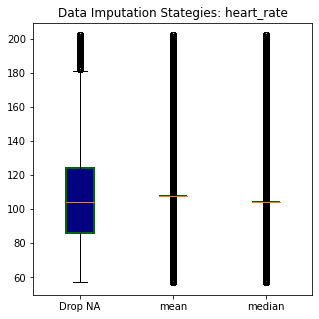

In [9]:
import matplotlib.pyplot as plt
def impute(variables):    #function to plot the box plot with imputational strategy applied(mean,median and removal NA)
    fig= plt.figure(1,figsize=(5,5))
    i = 111
    for variable in variables:
        ax=fig.add_subplot(i)
        bp = ax.boxplot([datafile[variable].dropna(),datafile[variable].fillna(datafile[variable].mean()),\
        datafile[variable].fillna(datafile[variable].median())],patch_artist=True)
        for box in bp['boxes']:
            box.set(color='#006400',linewidth=2)
            box.set(facecolor='#000080')
        for whisker in bp['whiskers']:
            plt.title('Data Imputation Stategies: %s' %variable)
            ax.set_xticklabels(['Drop NA','mean','median'])
            i += 1
        return
impute(['heart_rate'])  
            

Imputing the mean and median of the distribution can reduce the variance of the sample which may result in significant bias, as shown in above. As a result of this information, entries for heart rates that are not currently available will be excluded from the analysis while the explanatory power of the heart rate variable in relation to an individual's activity is evaluated. This method will remain consistent throughout the analysis if we discover that it does have some explanatory power. Even though most of the information will be lost in this method, we should still have a data set that is statistically representative of the population given its size. There are some benefits to this method, such as working with much smaller data.

In [10]:
datafile.duplicated().sum() # this will display if any duplicate entries are exist in the given data frame.


0

By running above code we can observe that there is no duplicate entries in this data file. Hence we are not droping any entries.If there is any duplicate value we can run the below code. 

In [11]:
##Removing the duplicates from the datafile if any values are repeated
#datafile = datafile.drop_duplicates()

In [16]:
datafile=datafile.fillna(datafile.mean())

In [17]:
datafile.head()

,timestamp,activityID,heart_rate,handtemperature,IMU_handAcc_16_X(ms-2),IMU_handAcc_16_Y(scale),IMU_handAcc_16_Z(resolution),IMU_handAcc_6_X(ms-2),IMU_handAcc_6_Y(scale),IMU_handAcc_6_Z(resolution),...,IMU_ankleAcc_6_X(ms-2),IMU_ankleAcc_6_Y(scale),IMU_ankleAcc_6_Z(resolution),IMU_ankleGyro_X,IMU_ankleGyro_Y,IMU_ankleGyro_Z,IMU_ankleMagneto_X,IMU_ankleMagneto_Y,IMU_ankleMagneto_Z,subjectID
2928,37.66,1,107.468502,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
2929,37.67,1,107.468502,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2930,37.68,1,107.468502,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
2931,37.69,1,107.468502,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
2932,37.70,1,100.000000,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1


In [18]:
datafile.isnull().values.any() # rechecking the NaN/Null values

False

In [19]:
datafile.isnull().sum()  #re counting the Null/NaN in each column

timestamp                        0
activityID                       0
heart_rate                       0
handtemperature                  0
IMU_handAcc_16_X(ms-2)           0
IMU_handAcc_16_Y(scale)          0
IMU_handAcc_16_Z(resolution)     0
IMU_handAcc_6_X(ms-2)            0
IMU_handAcc_6_Y(scale)           0
IMU_handAcc_6_Z(resolution)      0
IMU_handGyro_X                   0
IMU_handGyro_Y                   0
IMU_handGyro_Z                   0
IMU_handMagneto_X                0
IMU_handMagneto_Y                0
IMU_handMagneto_Z                0
chesttemperature                 0
IMU_chestAcc_16_X(ms-2)          0
IMU_chestAcc_16_Y(scale)         0
IMU_chestAcc_16_Z(resolution)    0
IMU_chestAcc_6_X(ms-2)           0
IMU_chestAcc_6_Y(scale)          0
IMU_chestAcc_6_Z(resolution)     0
IMU_chestGyro_X                  0
IMU_chestGyro_Y                  0
IMU_chestGyro_Z                  0
IMU_chestMagneto_X               0
IMU_chestMagneto_Y               0
IMU_chestMagneto_Z  

In [20]:
len(datafile) # length of the file 

1942872

As per the above output, we can observe that nulls/NaN values in the data file have been replaced with their mean value. 

And now we are left with the $1942872$  sample data entries which we will use for further analysis.


### B.1) The train-test Datasets split :

Splitting the data set into training and testing data set is the quickest procedure to compare the performance of the machine learning algorithms for the predictive modeling problems. This method applies when we have a large set of data where no additional configuration is required, and the classification of the data set is balanced.

•	$Train Dataset:$ Used to fit the machine learning model.
•	$Test Dataset:$ Used to evaluate the fit machine learning model.

The most commonly used split percentage for Training and Testing datasets are $80%$ and $20%$ respectively.

Now, we will review whether this data set is balanced to proceed with the splitting of dataset into Training and testing data set.


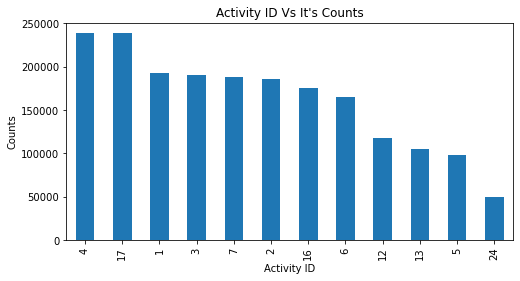

In [21]:
datafile['activityID'].value_counts().sort_values(ascending=False).plot(kind = "bar",figsize = (8,4))  # number of records by Activity
plt.title("Activity ID Vs It's Counts")
plt.xlabel("Activity ID")
plt.ylabel("Counts")
plt.show()

As per the above Bar graph, we can see that Dataset is balanced and we split this Dataset into two different pieces which are the 'Training' and 'Testing' datasets with 80% and 20%  of the random sample respectively.

In [22]:
from sklearn.utils import shuffle
shuffled_datafile= shuffle(datafile)
datafile_trainset = shuffled_datafile[:int(0.8*len(shuffled_datafile))]
datafile_testset = shuffled_datafile[int(0.8*len(shuffled_datafile)):]

### B.2) Variable 1 - Temperature :

Firstly, we will consider the variable $‘temperature’$ for our further analysis. To evaluate how the body temperature is distributed across the three body parts which are the Hand, Chest, and Ankle during the activities. For this, we consider the $Violin plot$ method.

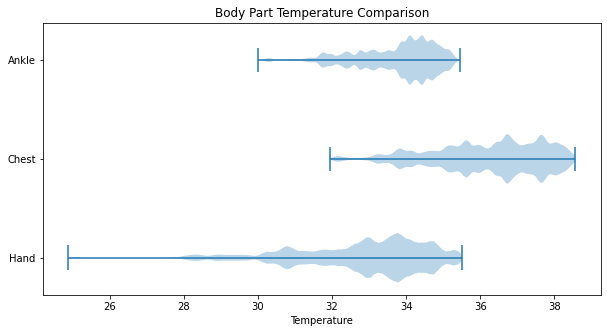

In [23]:
fig = plt.figure(5,figsize=(10,5))  #this code will plot Body part tempearture so we can compare between parts
ax = fig.add_subplot(1,1,1)
position = [1,2,3]
ax.violinplot([datafile_trainset['handtemperature']\
               ,datafile_trainset['chesttemperature']\
                ,datafile_trainset['ankletemperature']],position,vert=False)
ax.set_yticks(position)
ax.set_yticklabels(['Hand','Chest','Ankle'])
plt.title('Body Part Temperature Comparison')
plt.xlabel('Temperature')
plt.show()

As can be seen from the violin plots above, the chest temperature has the highest value, ranging from 32 to 39. Additionally, the temperature of the hand and ankle ranges from 30 to 35 degrees. The temperatures are negatively skewed for all three-body parts; However, the temperature of the ankle has less variance. Therefore, we will understand how this is being carried out if we apply linear regression to measure activity-related hand,chest and anklet temperatures.

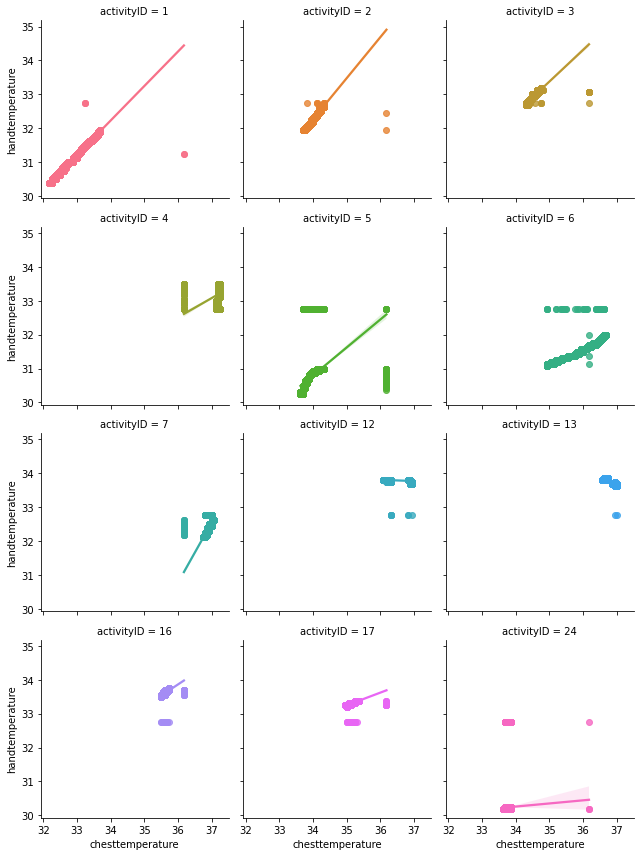

In [24]:
import seaborn as sns
subject1 = datafile[datafile['subjectID']==1] # Targeting on subject1 to get clear view
fig = sns.lmplot(x='chesttemperature', y='handtemperature', col="activityID", hue="activityID",data=subject1, col_wrap=3, height=3)
plt.show()

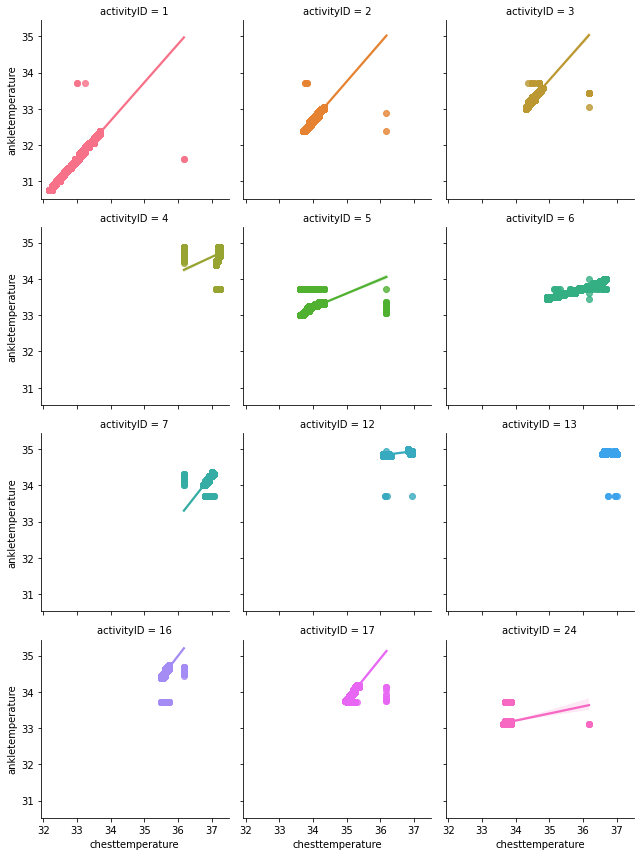

In [25]:
import seaborn as sns
subject5 = datafile[datafile['subjectID']==1] # Targeting on subject1 to get clear view
fig = sns.lmplot(x='chesttemperature', y='ankletemperature', col="activityID", hue="activityID",data=subject5, col_wrap=3, height=3)
plt.show()

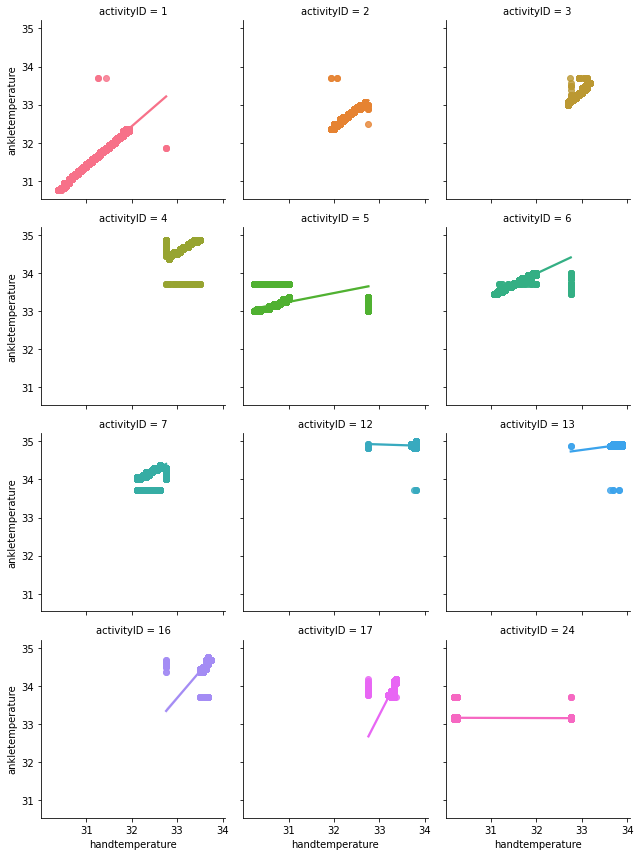

In [26]:
import seaborn as sns
subject5 = datafile[datafile['subjectID']==1] # Targeting on subject1 to get clear view
fig = sns.lmplot(x='handtemperature', y='ankletemperature', col="activityID", hue="activityID",data=subject5, col_wrap=3, height=3)
plt.show()

We have plotted the line graph to identify the correlation between the hand-chest, anklet-chest, and hand-anklet temperature.
As per the above graphs, there is a strong correlation between **hand-chest and anklet-chest temperatures** compared to the **hand-anklet temperature**. Additionally, we can observe that the **hand-chest has the strongest correlation among all**. 
Based on the preceding evidence, we hypothesize that there is a generally **positive relationship** between **hand and chest temperature**.

### B.3) Variable 2 -  Heart rate :

Secondly, using descriptive statistics and distribution charts, we will concentrate on the heart rate variable to gain a clear understanding of it.

In [27]:
datafile_trainset.describe().round(3) # With the help of describe() function, we will get all the statistics-related calculated values 

,timestamp,activityID,heart_rate,handtemperature,IMU_handAcc_16_X(ms-2),IMU_handAcc_16_Y(scale),IMU_handAcc_16_Z(resolution),IMU_handAcc_6_X(ms-2),IMU_handAcc_6_Y(scale),IMU_handAcc_6_Z(resolution),...,IMU_ankleAcc_6_X(ms-2),IMU_ankleAcc_6_Y(scale),IMU_ankleAcc_6_Z(resolution),IMU_ankleGyro_X,IMU_ankleGyro_Y,IMU_ankleGyro_Z,IMU_ankleMagneto_X,IMU_ankleMagneto_Y,IMU_ankleMagneto_Z,subjectID
count,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,...,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000,1554297.000
mean,1705.270,8.083,107.464,32.758,-4.941,3.579,3.606,-4.874,3.568,3.790,...,9.377,-0.049,-2.173,0.010,-0.037,0.008,-31.579,1.410,17.228,4.565
std,1093.456,6.175,8.145,1.787,6.216,6.878,3.951,6.221,6.573,3.936,...,6.057,7.185,3.470,1.125,0.636,2.007,18.316,21.647,19.679,2.333
min,31.200,1.000,57.000,24.875,-145.367,-104.301,-101.452,-61.215,-61.835,-61.935,...,-60.307,-61.906,-62.315,-23.995,-18.127,-13.270,-172.624,-137.908,-102.716,1.000
25%,744.880,3.000,107.469,31.688,-8.945,1.074,1.172,-8.843,1.074,1.375,...,8.422,-2.059,-3.395,-0.204,-0.105,-0.430,-41.674,-12.373,3.837,2.000
50%,1480.220,6.000,107.469,33.125,-5.386,3.552,3.465,-5.308,3.569,3.701,...,9.547,-0.211,-2.003,0.005,-0.004,-0.002,-33.888,0.913,18.608,5.000
75%,2663.590,13.000,107.469,34.062,-0.985,6.431,6.529,-0.934,6.440,6.774,...,10.267,1.907,-0.603,0.128,0.114,0.090,-17.948,17.786,31.140,7.000
max,4245.680,24.000,202.000,35.500,62.860,155.699,157.760,52.821,62.260,61.728,...,61.969,62.046,60.936,17.420,13.588,16.529,91.552,94.248,146.900,9.000


By running the above code, we can evaluate the statistical values such as mean, standard deviation, percentile, etc which is can be applied for further analysis.

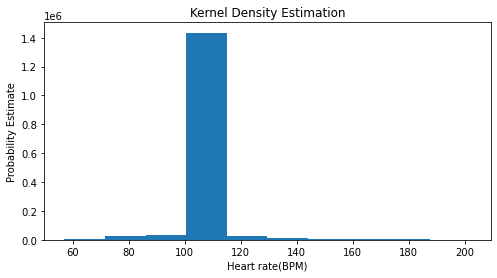

In [28]:
figure = plt.figure(2,figsize=(8,4)) # Plotting the heart rate distribution and probability estimate using kernel density estimation.
plt.hist(datafile_trainset['heart_rate'])
plt.title('Kernel Density Estimation')
plt.ylabel('Probability Estimate')
plt.xlabel('Heart rate(BPM)')
plt.show()

We can see that the peaks are distributed between 100 and 120 BPM from the above distribution chart. Additionally, the aforementioned statistics table reveals that the lowest heart rate is 57 and the highest is 202 and the mean value is 107.463. We can plot the box plot and analyze the outliers to comprehend them.

In [29]:
datafile_trainset.groupby('activityID').describe()['heart_rate'].round(3) # this will give us the Statistics values by Activities

,count,mean,std,min,25%,50%,75%,max
activityID,,,,,,,,
1,153960.0,104.537,9.761,57.000,107.469,107.469,107.469,115.0
2,147911.0,104.964,8.263,63.000,107.469,107.469,107.469,113.0
3,152266.0,105.743,6.233,68.000,107.469,107.469,107.469,112.0
4,191007.0,107.951,3.257,86.000,107.469,107.469,107.469,128.0
5,78562.0,111.923,15.690,81.000,107.469,107.469,107.469,196.0
6,131594.0,109.056,5.644,81.000,107.469,107.469,107.469,144.0
7,150513.0,108.958,5.759,78.000,107.469,107.469,107.469,147.0
12,93740.0,109.485,8.941,71.000,107.469,107.469,107.469,171.0
13,83891.0,109.445,9.293,78.000,107.469,107.469,107.469,175.0


We can use the statistical values provided in the preceding table for the subsequent level of analysis.

In [30]:
# Descriptive statistics:
descriptive_heart_rate = datafile_testset.groupby(['activityID'])['heart_rate'].describe()

activity_asc_index = descriptive_heart_rate['mean'].sort_values(ascending=False)
activity_heart_rate = []
for activity,ignore in activity_asc_index.iteritems():
    act = (datafile_testset[datafile_testset['activityID']==activity]['heart_rate'])
    activity_heart_rate.append(act)

import scipy.stats as sp
activity_heart_rate = []
for activity,ignore in activity_asc_index.iteritems():
    act = (datafile_testset[datafile_testset['activityID']==activity]['heart_rate'])
    activity_heart_rate.append(act)
sp.levene(activity_heart_rate[1],activity_heart_rate[4], center='mean')

LeveneResult(statistic=3986.7374691904092, pvalue=0.0)

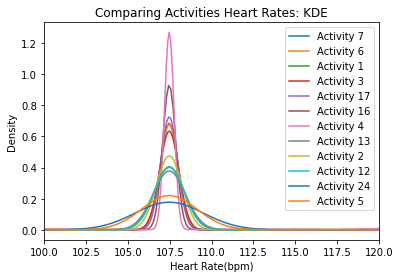

In [31]:
fig, ax = plt.subplots() #plotting line chart with multiple activities dimension
ax.set_xlim(100, 120)
for activity in datafile_trainset['activityID'].unique():
    s = datafile_trainset[datafile_trainset['activityID'] == activity]['heart_rate']
    s.plot.kde(ax=ax, label='Activity %i'%activity)
ax.legend()
plt.title('Comparing Activities Heart Rates: KDE')
plt.xlabel('Heart Rate(bpm)')
plt.show()

We can see various subgroups of the heart variable with various distributions and peaks, as you can see in the above Kernel Density Estimate (KDE) chart. For instance, activity 4(Walking) has the highest peak between 105 and 110 BPM, while activity 24(Robe Jumping) has the lowest peak between 100 and 112.5 BPM.

Text(0, 0.5, 'Heart rates')

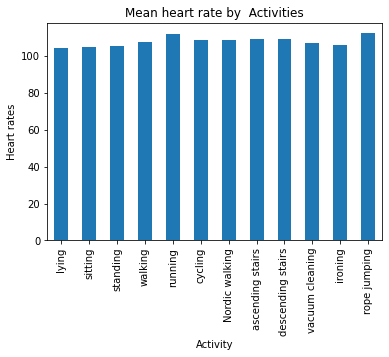

In [32]:
df_heartrateactivity=datafile_trainset['heart_rate'].groupby(datafile_trainset['activityID']).mean()  # Plotting mean heartrates by activities
df_heartrateactivity.index = df_heartrateactivity.index.map(activity_ID)
df_heartrateactivity.plot(kind='bar')
plt.title("Mean heart rate by  Activities")
plt.xlabel("Activity")
plt.ylabel("Heart rates")

As the graph above demonstrates, **running** and **rope jumping** will be challenging activities due to their high mean heart rates and **lying** have the lowest heart rate. As an indicator, we can see how the heart rate changes with each activity.

### B.4) Variable 3 - Acceleration :

Next, the following variable will be considered: Acceleration which involves all three parts of the body: Chest, hand, and ankle. We will also plot the violin chart to compare the distribution of these body parts over Acceleration.

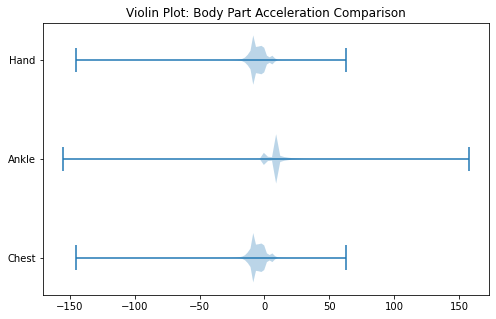

In [33]:
fig = plt.figure(5,figsize=(8,5))        #this code will plot Body part acceleration so we can compare between parts
ax = fig.add_subplot(1,1,1)
position = [1,2,3]
ax.violinplot([datafile_trainset['IMU_handAcc_16_X(ms-2)']\
                ,datafile_trainset['IMU_ankleAcc_16_X(ms-2)']\
                ,datafile_trainset['IMU_handAcc_16_X(ms-2)']],position,vert=False)
ax.set_yticks(position)
ax.set_yticklabels(['Chest','Ankle','Hand'])
plt.title('Violin Plot: Body Part Acceleration Comparison')
plt.show()

Ankle acceleration has the highest average measure, while hand and chest acceleration have the lowest, as shown in the above plot. While the Hand and Chest are significantly skewed positively, the Ankle appears to have a relatively small variance.

Let's plot the line chart below to see the acceleration distribution for each activity.


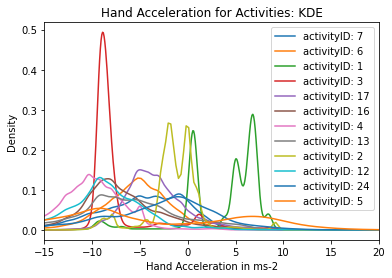

In [34]:
def kde(variable,xmin,xmax,title,xlabel,grouping): #function to plot KDE 
    fig, ax = plt.subplots()
    ax.set_xlim(xmin,xmax)
    for group in datafile_trainset[grouping].unique():
        s = datafile_trainset[datafile_trainset['activityID'] == group][variable]
        s.plot.kde(ax=ax, label='%s: %i'%(grouping,group))
    ax.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()
    return
kde('IMU_handAcc_16_X(ms-2)',-15,20,'Hand Acceleration for Activities: KDE','Hand Acceleration in ms-2','activityID') # KDE aginst hand acceleration

Activities don't look very alike if we look at the mean hand acceleration from the above plot. Some activities have similarities, but others don't.

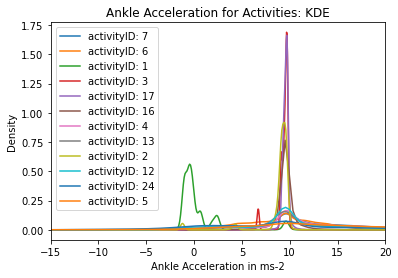

In [35]:
kde('IMU_ankleAcc_16_X(ms-2)',-15,20,'Ankle Acceleration for Activities: KDE','Ankle Acceleration in ms-2','activityID') # KDE aginst ankle acceleration

The majority of activities have the same mean for the aforementioned ankle plot; However, if we observe activity 1, the mean acceleration is significantly lower.

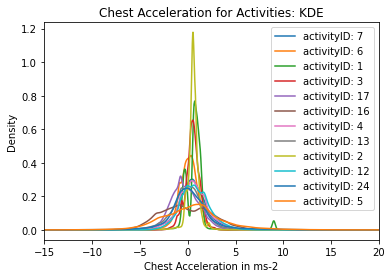

In [36]:
kde('IMU_chestAcc_16_X(ms-2)',-15,20,'Chest Acceleration for Activities: KDE','Chest Acceleration in ms-2','activityID')# KDE aginst chest acceleration

Last but not least, if we look at the plot of the chest part acceleration, Activity 2 has the highest density around its mean value and smaller variance.

According to the chest, ankle, and hand charts, the acceleration of the chest during each activity appears to be comparable.

## C) Hypothesis Testing:

### C.1) Hypothesis1:

We can make a hypothesis based on the linear regression which is plotted on the hand-chest temperature correlation.

**“If the temperature of the hand and chest are correlated, then the correlation between the hand-chest temperature is strong."**

* $Null Hypothesis,$ $𝐻$$0$: If there is no correlation between hand temperature and chest temperature, $Regression (Slope) coefficient$ $=$ $0$

* $Alternative Hypothesis,$ $H$$a$: The temperature of the hands and chest are correlated then the $Regression coefficient$ $!=$ $0$

$Y$ $=$ $mX$ $+$ $b$ is the equation for the linear regression line, where b is a constant, m is the slope, X is the value of the independent input variable, and Y is the predicted value of the dependent output variable.

This hypothesis will be tested using the linear regression model. If the probability value falls below the usual p-value of $0.05$, we reject the Null Hypothesis; If not, an alternative hypothesis is chosen. Let's find the $p-value$ so that we can carry out the hypothesis test.

In [37]:
fit = sp.linregress(datafile_testset['handtemperature'],datafile_testset['chesttemperature'])
fit

LinregressResult(slope=0.6299134836420531, intercept=15.544902559333178, rvalue=0.75403026458777, pvalue=0.0, stderr=0.0008802685693012589, intercept_stderr=0.028877493887316193)

We reject the null hypothesis and accept the alternative hypothesis as there is a **relationship between the temperature of the chest and the temperature of the hands** since we obtained a p-value lower than the standard p-value of $0.05$ which is $0$.

### C.2) Hypothesis 2:

**“If the heart rate varies based on the activities, then complex activities will result in high heart rates.”**

In this natural hypothesis, we have considered two variables: activities and heart rates.

The Null Hypothesis, $H$$0$: If activities have no effect on heart rates: We assumed a mean value $μ$$=$$105$.

An Alternative Hypothesis, $𝐻$$a$: If physical activities raise heart rates. $𝐻$$a$: We assumed a mean value $μ$$≥$$105$

To test this hypothesis, we need a probability value to standardize the thesis, and the p-value has a critical level value equal to 0.05. If the p-value is less than or equal to 0.05, we reject the null hypothesis and accept the alternative hypothesis. So to calculate the p-value, we have to perform the Z test and find the Z value.


$Z$ = $(X  –  μ)$ / $(σ  /  √n)$

where $Z$	= $Z-test$ ,$X$=$sample$ $average$, $μ$=$mean$, ${σ}$ = $standard$ $deviation$

Here we already have the below values, 
N =1554297
𝑋̅ (sample mean) =107.465
μ =105
σ (Standard deviation) =8.168

We need a probability value to standardize the thesis to test this hypothesis, and the p-value has a critical level value of 0.05. We accept the alternative hypothesis and reject the null hypothesis if the p-value is less than or equal to 0.05. Therefore, we must conduct the Z test and determine the Z value to calculate the p-value based on the above-listed values.


In [38]:
Sample_means=datafile.heart_rate.mean()
heart_std=datafile.heart_rate.std()
Activity_count=datafile.heart_rate.count()

z_value = (Sample_means-105)/(heart_std/np.sqrt(Activity_count))
print('z_value for the heart_rate :',+z_value)


z_value for the heart_rate : 422.07412060463605


We have evaluated the Z-values, i.e., $Z$ $≥$ $422.074$ which we will substitute to get the p-value as show below.

In [39]:
#hypothesis test,finding p value
from scipy import stats
p_value=1-stats.norm.cdf(422.074)
print("p_value correspanding to z_value greater or equal to 422.074 is ", p_value)

p_value correspanding to z_value greater or equal to 422.074 is  0.0


The $Z-value$ and p-value are $422.074$ and $0$ respectively. However, the significant $p-value$ should be $0.05$ is greater than the p-value we obtain through the $Z-test$. As a result, we will accept the alternative hypothesis and reject the null hypothesis, which states that **engaging in more complex activities raises heart rates.**

## D) Predictive Modeling:

The developed model that can use multiple attributes from the available dataset to make predictions will be the primary focus of this analysis. The target value will be assumed to be approximated using a linear combination of the input features in this model.

$Y$ = $a$ + $B1$$X1$ + $B2$$X2$ + $C$

$Y$ =>  Dependent variable.

$X1$ => Observed score Independent Variable 1.

$X2$ => Observed score Independent Variable 2.

$e$ =>  An error or residual.

$a$ =>  intercept.

$B1$ $and$ $B2$ => the slope.

This will be accomplished with the help of multi-linear regression. The expression is given two more parameters, Intercept(a) and random error term(e), and we estimate the values or numbers (B1 and B2) that will be multiplied by the independent variable. Additionally, the primary focus of the random error term is on unpredictable random fluctuations. This model will provide us with a satisfactory approximation and instinctive interpretation with the assistance of the dependent and independent.

### D.1) Prediction 1 - Heart Rate:

This model will be constructed using the Heart rate variable. We know that the linear relationship is necessary for the regression; The best variables for the model are those with the highest correlations; In either case, the weakest negative correlation is the one that works best with the model.

In [40]:
print('Top Heart Rate Correlations: ')
datafile_trainset.corr()['heart_rate'].sort_values(ascending=False)[0:3]  #Heart rate correlation

Top Heart Rate Correlations: 


heart_rate            1.000000
timestamp             0.235960
IMU_chestMagneto_Z    0.136069
Name: heart_rate, dtype: float64

In [41]:
from sklearn import linear_model
def linear_regression(train,test,target_variable,variable1,variable2):  # Function which returns the coefficeints of a Linear-Regression fit and R^2 coefficent
    x_train= train.loc[:,[variable1,variable2]]
    y_train = train.loc[:,[target_variable]]
    x_test = test.loc[:,[variable1,variable2]]
    y_test = test.loc[:,[target_variable]]
    regression_instance = linear_model.LinearRegression().fit(x_train,y_train)
    coefficients = regression_instance.coef_.tolist()
    intercept = int(regression_instance.intercept_)
    train_score = regression_instance.score(x_train,y_train)
    test_score = regression_instance.score(x_test,y_test)
    return coefficients, intercept, train_score, test_score, regression_instance

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
def predictive_model(train,test,target_variable,variable1,variable2,fig_no): #function to call liner_regression function and plot the model and scatter plot.
    coefficients, intercept, train_score, test_score, regression_instance = linear_regression(train,test,target_variable,variable1,variable2)
    xvalues = np.linspace(datafile[variable1].min(),datafile[variable1].max(),100)
    yvalues = np.linspace(datafile[variable2].min(),datafile[variable2].max(),100)
    xx,yy = np.meshgrid(xvalues,yvalues)
    onlyX = pd.DataFrame({variable1: xx.ravel(), variable2: yy.ravel()})
    zz = np.array(intercept) + np.array(coefficients[0][0]) * xx + np.array(coefficients[0][1]) * yy
    fig=plt.figure(fig_no,figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx,yy,zz.reshape(xx.shape),cmap=plt.cm.RdBu_r, alpha=0.6,linewidth=3) # Plot model landscape
    ax.scatter(train[variable1][:1000],train[variable2][:1000],train[target_variable][:1000],color='blue',label='Training Data') # Plot training data points
    ax.scatter(test[variable1][:1000],test[variable2][:1000],test[target_variable][:1000],color='green',label='Testing Data') # Plot testing data points
    ax.set_xlabel('%s'%variable1)
    ax.set_ylabel('%s'%variable2)
    ax.set_zlabel("%s"%target_variable)
    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
    plt.title('Linear Regression \n Estimated model: %s = %.3f x %s + %.3f x %s+ %.3f' % (target_variable,coefficients[0][0],variable1,coefficients[0][1],variable2,intercept))
    plt.show()
    return coefficients, intercept, train_score, test_score, regression_instance

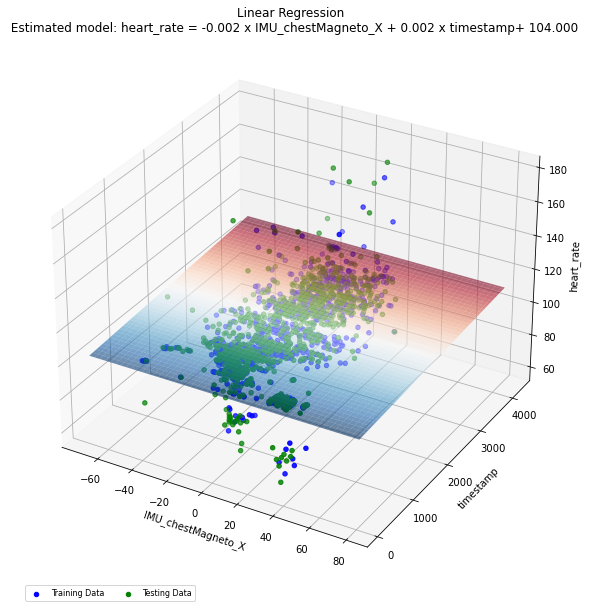

In [43]:
model_heart = predictive_model(datafile_trainset,datafile_testset,'heart_rate','IMU_chestMagneto_X','timestamp',12)

The aforementioned three-dimensional plot model appears to fit the data points fairly well, except for the lower and upper tails. This model might be better suited to a quadratic fit.

### D.2) Prediction 2 - Chest Temperature:

The same approach can be used to predict chest temperature.

In [44]:
print('Top Chest Temperature Correlations:')
datafile_trainset.corr()['chesttemperature'].sort_values(ascending=False)[0:3]

Top Chest Temperature Correlations:


chesttemperature    1.000000
handtemperature     0.754418
ankletemperature    0.547719
Name: chesttemperature, dtype: float64

We can train the model to minimize squared errors using the aforementioned variable observation. Now, we can plot both the hyperplane result and the model.

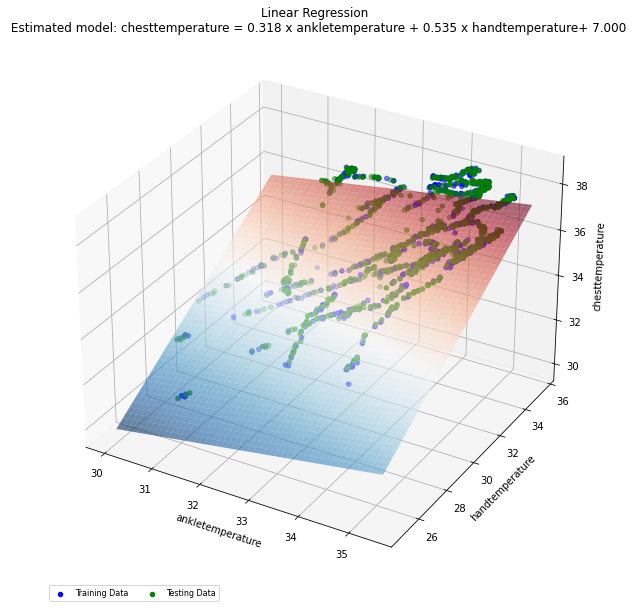

In [45]:
model_parts = predictive_model(datafile_trainset,datafile_testset,'chesttemperature','ankletemperature','handtemperature',11)

The graph above shows that each point has a relatively high degree. The module evaluation section follows can cover the quantified data of the module. Following this, we will continue the developed model's quantitative evaluation and monitor both models' performance. Next, we will be moving on to the model evaluation.

### D.3) Evaluation of Model :

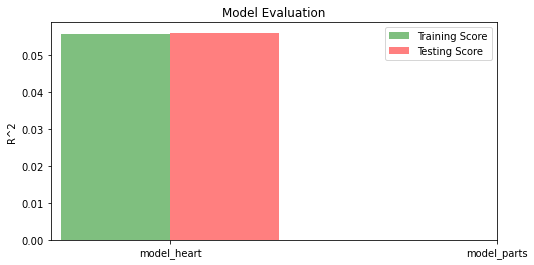

In [46]:
models = [model_heart,model_parts]
def model_evaluation(models):
    figure = plt.figure(8,figsize=(8,4))
    ax = figure.add_subplot(111)
    j = 1
    e = 2
    for i in models:
        ax.bar([j],i[2],1,color='green',alpha=0.5)
        ax.bar([e],i[3],1,color='red',alpha=0.5)
        plt.legend(['Training Score','Testing Score'])
        j += 3
        e += 3
        plt.title('Model Evaluation')
        plt.ylabel('R^2')
        ax.set_xticks([1.5 + (3*i) for i in range(len(models))])
        ax.set_xticklabels(['model_heart','model_parts'])
        plt.show()
        return
model_evaluation(models)

When we conduct quantitative analyses of the two models, we find that their results are comparable and that there is approximately 60% variation in the variable. Additionally, the testing score and training score of both models are fairly comparable. Rather than overfitting the data, this result demonstrates that our models are adept at generalizing to new data.

### D.4) Activity Based Predictive Modeling:

Using unlabelled data, we will examine the variable activityID in this section to determine the performed activity. Because devices will automatically record data that may not explicitly inform the device that what activity is carried out, a particular class of activities will have commercial viability. Therefore, advertising a particular activity preference will target the individual and expand the commercial reach if alternative strategies are utilized.

Due to its numerous dimensions, the data set must be processed.

The high dimensionality of the data sets will be addressed with Principal Component Analysis (PCA). Because it can display our data set in a low-dimensional manner, PCA will assist us in selecting the classification model. Standardizing the data to a zero center and taking responsibility for the units that differ between variables are two ways to accomplish this. The PCA's identification of the data set's most variable components and axes yields the dataset's covariance matrix's largest eigenvalues. The number of components used is a hyperparameter that must be selected during the data transformation to new axes. Due to the specific order in which they are carried out, the timestamps for each activity will differ. The classification performance will unquestionably improve, even though the timestamp column will not be included in the analysis because this property will not affect anything in the real world.

By plotting the heat map, we can now evaluate the correlation with our dataset and determine whether we need to whiten the data. Let's look at the correlation heatmap that is below.


Text(0.5, 1.0, 'Variable Correlation: Heatmap')

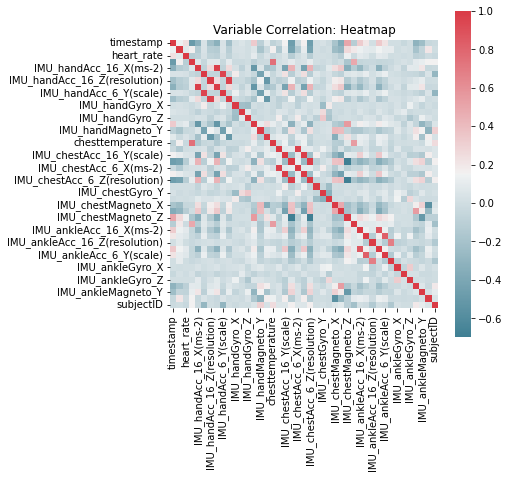

In [47]:
corr = datafile_trainset.corr()
# observe scatter_matrix
import numpy as np
import seaborn as sns
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Variable Correlation: Heatmap')

The data set has many correlation features, as shown in the heat map above. As a result, PCA will be carried out alongside the whitening pre-treatment.

In [48]:
def model_drop(datafile): # this function will filter the dataframefor the feature inputs and targets
    Y = datafile['activityID'] # set Y to the activity labels
    X = datafile.drop(['activityID'], axis=1) # remove the activity labels for X
    X = X.drop(['timestamp'],axis=1) # also remove the timestamp
    return X,Y

Data visualization below represents with the first three principle components grouped by activity in a different shades.

C:\Users\jomij\AppData\Local\Temp\ipykernel_71504\1931529725.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


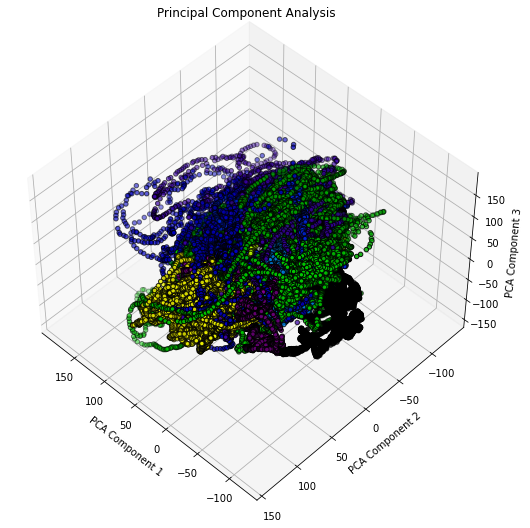

In [49]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets


X,y = model_drop(datafile_trainset)
fig = plt.figure(15, figsize=(7, 7))
plt.clf() # clear figure
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla() # clear axis
pca = decomposition.PCA(n_components=3, whiten=False) # create PCA instance
pca.fit(X) # fit pca
X = pca.transform(X) # transform X via PCA fit
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,cmap=plt.cm.nipy_spectral,edgecolor='k') # plot PCA transformed points and highlight each activity with a different colour
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('Analysis of Principal Component ')
plt.show()

From the above representation, we can see that some activities are not separatable linearly. Hence logistic regression method is not appropriate for all cases. For example, light blue and green are not separated in linear for all instances. In this case, we will be considering the $k-nearest neighbors classification (KNN)$ algorithm since we cannot consider the Logistic Regression as all cases are not linearly separatable. Since the model is distributed from the data, KNN is non-parametric because $it does not make any assumptions about the data being studied.$
The k-nearest neighbor algorithm uses the similarity measure (such as distance functions) to classify a new data point and store all the available data. If there are new data, it will quickly classify new data into the appropriate category by using the K-NN algorithm. For instance, suppose we selected K to be 4, and the four activities closest to this unlabeled data point were as follows:1,1,2, and 3. The KNN classifier would classify this point as one because the most common activity for those four neighbors (majority voting system) is at this point. As a result, this procedure is repeated for each testing instance.


### Optimizing Hyperparameters:

Since it considers a larger proportion of Euclidean space, the more generalized model is typically obtained with a higher K. While the classifier becomes more sensitive to variation within the dataset and may overfit when K is lower.

For higher K values, we can use the first two principal components to plot the graph on the k-nearest neighbors algorithm's decision boundary to demonstrate this.


In [50]:
# import required packages
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

def model_training(X,y,n_components,n_neighbors):
    pca = decomposition.PCA(n_components=n_components, whiten=True) # create PCA instance with given parameters
    pca.fit(X) # fit PCA
    X = pca.transform(X) # transform X via the PCA fit
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors) # create the KNN instance
    classifier=knn.fit(X,y) # fit the KNN model
    return classifier,X,pca

In [51]:
def decision_boundary(classifier,title,X,y,figure,subplot_no):
    h = 0.1
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = np.array(y)[idx]
    figure.add_subplot(subplot_no)
    # Plot only 1000 random points (otherwise data set will be too crowded)
    X = X[:100]
    y = y[:100]
    # create mesh plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('tight')
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    return

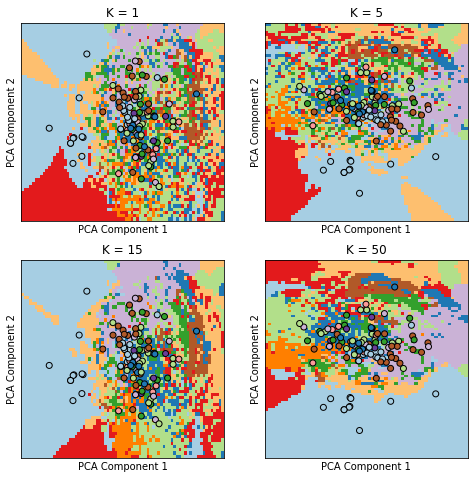

In [52]:
k = [1,5,15,50] # a list of the K neighbor parameters to trial
j = 221
figure = plt.figure(16,figsize=(8,8))
X,y = model_drop(datafile_trainset)
for i in k:
    classifier,X = model_training(X,y,2,i)[:2] # train classifier for each k value
    decision_boundary(classifier,'K = %i'%i,X,y,figure,j) # plot the decision boundary
    j += 1
plt.show()

If we look at the decision boundary plots above, we can see that the boundary is very erratic when K is 1.

We can see from the plots of the decision boundary above that when K is set to 1, the decision boundary is extremely inconsistent and sensitive to the local data points. From K=1 to K=50, we can see that the decision boundary becomes more generalized and resistant to local class labels as we increase the K value.

Therefore, based on the preceding observations, it is abundantly clear that selecting the appropriate K value is essential for accurate classification. As a result, the optimization of this parameter and the number of principal components will be the primary focus of the subsequent step.

We need the number of principal components and nearest neighbors to perform this. The cross-validation method with two folds will be used to validate or test these two over a range of values. We will experiment with these two. The PCA fit transform is followed by the number of principal components, which has been selected as a hyperparameter. As a result, they were incorporated into the data pipeline to train each fold.

To be more specific, we will divide the training data into two folds, each fold taking the training and testing sets that were left out. The model for the training set will first be applied to the data before it is validated on the left-out set. The testing score will be averaged over two turns and then, determine the ratio of correctly classified activities. We will choose this method because it will reduce the likelihood that we will optimize hyperparameters based on overfitting patterns.


In [53]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# reinitialise the knn and pca instances
pca = decomposition.PCA(n_components=2, whiten=True)
knn = neighbors.KNeighborsClassifier()
# create a data pipeline
pipe = Pipeline([('reduce_dim', pca),('classify', knn)])
# # create a parameter grid of the range of hyperparameters to use
param_grid = [{'classify__n_neighbors': [4,7,9],'reduce_dim__n_components':[3,6,9]}]

X,y = model_drop(datafile_trainset)
grid = GridSearchCV(pipe, cv=2, n_jobs=2, param_grid=param_grid)
grid.fit(X, y)
print('Best Score: ',grid.best_score_)
print('Best Estimator:',grid.best_params_)

Best Score:  0.9804689838143805
Best Estimator: {'classify__n_neighbors': 4, 'reduce_dim__n_components': 9}


The best parameter, as determined by the cross-Validation Grid search is, when the number of Principal Components is set to 9 and the number of neighbors is set to 4. We must remember that we have searched only a small subset of parameters. As a result, we are likely part of the local set. The experiment's wide range of parameters should be taken into consideration if we intend to carry out any research in the future.

In [54]:
classifier,X,pca = model_training(X,y,4,9) # refit on model
X_test,y_test = model_drop(datafile_testset) # get testing into correct format
X_test = pca.transform(X_test) # transform testing via fitted PCA transform
classifier.predict(X_test) # predict the testing data labels
print('Testing Accuracy: ', classifier.score(X_test,y_test)) # get the testing score

Testing Accuracy:  0.8536138454609792


Our overall accuracy is 85.36%. This suggests that our model can correctly predict which activity is taking place on an unlabeled and unobserved data set 85.36% of the time.

The primary characteristics of physical activity are the heart rate and the temperature of the chest. During the exercises, the chest temperature revealed significant pulse-related areas of strength. Heart rate is affected by changes in temperature and activities performed. Therefore, we can improve an individual's health benefits by utilizing hardware and software to record and process activity data.

#### Reference :

1) https://en.wikipedia.org/wiki/Kernel_density_estimation
2) https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/